In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
Vol = 0.2
Irate = 0.05
Strike = 100
Expiration = 1
Option = 'P'
EarlyExp = 'N'      #American (Y) or European option 
NAS = 20

dS = 2 * Strike / NAS
dt = 0.9 / NAS / NAS / Vol / Vol             #for model to be stable dt <= 1/NAS/NAS/Vol/Vol
NTS = int(Expiration / dt) + 1
dt = Expiration / NTS

In [112]:
#condition to check call or put
q = 1
if Option == 'p' or Option == 'P': 
    q = -1

In [113]:
S = []
VOld = []
Payoff = []
for i in range(NAS+1):
    S.append(i * dS)
    VOld.append(np.maximum(q * (S[i] - Strike), 0))
    Payoff.append(VOld[i]) # Payoff

In [114]:
for k in range(NTS):
    VNew = []
    temp = []
    for i in range(1,NAS): # 1 to 19 when NAS = 20
        Delta = (VOld[i + 1] - VOld[i - 1])/(2 * dS)
        Gamma = (VOld[i + 1] - 2 * VOld[i] + VOld[i - 1])/(dS**2)
        Theta = -0.5 * Vol * Vol * S[i] * S[i] * Gamma - Irate * S[i] * Delta + Irate * VOld[i] #   BSE
        temp.append(VOld[i] - dt * Theta)
   

    VNew = [VOld[0] * (1 - Irate * dt)]  + temp # append an element in the beginning use [element] + old
    VNew.append( VNew[NAS - 1] +  (VNew[NAS - 1] - VNew[NAS - 2]))  # Gamma=0 at S=infinity
    
    for i in range(NAS+1):
        VOld[i] = VNew[i]
    
    if EarlyExp == 'Y':
        for i in range(NAS +1):
            VOld[i] = np.maximum(VOld[i], Payoff[i])

In [115]:
OptValue = []
for i in range(NAS+1):
    OptValue.append(VOld[i])

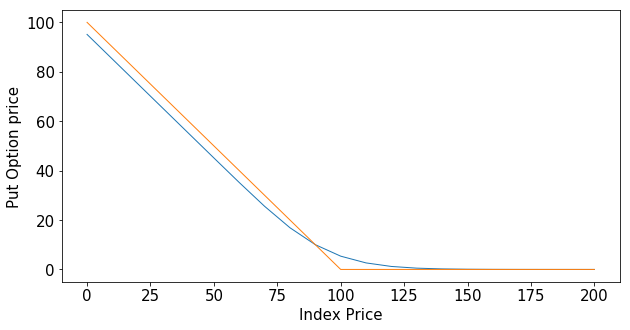

In [117]:
OpTyp = 'Call'
if Option == 'P' or Option == 'p':
    OpTyp = 'Put'

#plot discounted Convergence vs number of iterations
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
#plt.grid(True)
plt.plot(S,OptValue,lw=1)
plt.plot(S,Payoff,lw=1)
plt.xlabel('Index Price')
plt.ylabel('{} Option price'.format(OpTyp));